In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [9]:
df = pd.read_csv('svm_customer_data.csv')
df

,Age,Balance,Exited
0,32.980285,19912.928365,0.0
1,29.170414,37342.895576,0.0
2,33.886131,46977.249576,0.0
3,39.138179,38259.722084,0.0
4,28.595080,17845.040272,0.0
...,...,...,...
495,40.645537,76626.796485,1.0
496,46.120601,101572.238322,1.0
497,40.467702,87690.114335,1.0
498,41.330893,73145.852123,1.0


In [10]:
X = df[['Age','Balance']].values
y = df['Exited'].values

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.46041604, -1.30428179],
       [-0.86736471, -0.67169328],
       [-0.36365871, -0.32203218],
       [ 0.1973351 , -0.63841876],
       [-0.92881865, -1.37933197],
       [-0.92880813, -1.07878519],
       [ 0.23334196, -0.57034851],
       [-0.28691508, -1.1436586 ],
       [-1.07963254, -0.80932927],
       [-0.43103406, -0.71327882],
       [-1.07575089, -1.20731999],
       [-1.07723266, -0.95547304],
       [-0.6236829 , -1.87927668],
       [-2.00494719, -1.23561621],
       [-1.8842284 , -1.01152209],
       [-1.13911517, -1.30047804],
       [-1.42786215, -0.46422728],
       [-0.57735644, -1.35342488],
       [-1.3606928 , -1.06595496],
       [-1.68387845, -0.90023023],
       [ 0.16056038, -0.51972329],
       [-0.9234499 , -1.35508588],
       [-0.73547522, -0.60047107],
       [-1.69185394, -0.93521901],
       [-1.12764023, -1.2231665 ],
       [-0.70766437, -0.80402059],
       [-1.5164085 , -0.8803941 ],
       [-0.53797356, -1.11246025],
       [-1.16369388,

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=31)

Kernel: LINEAR||Accuracy:1.00


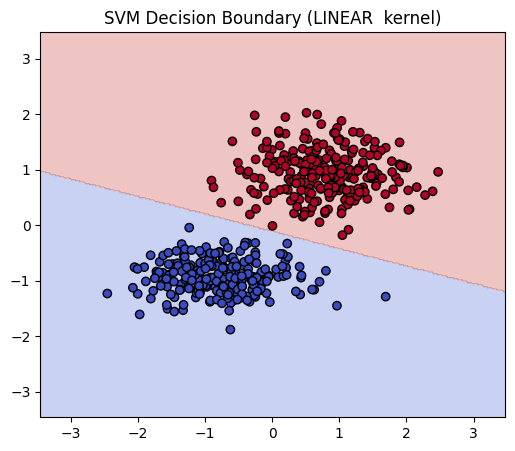

Kernel: POLY||Accuracy:0.99


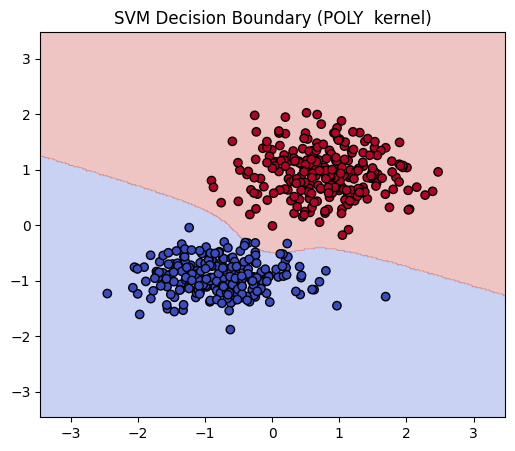

Kernel: SIGMOID||Accuracy:1.00


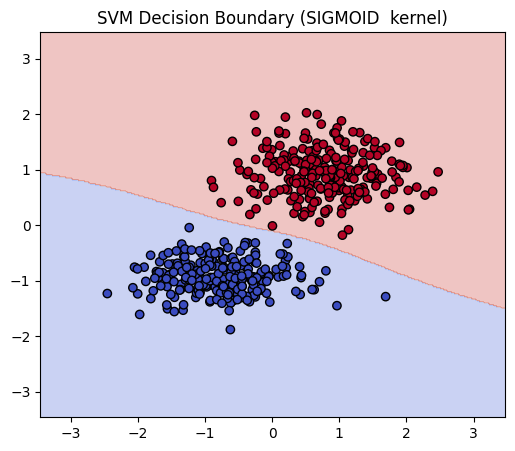

Kernel: RBF||Accuracy:1.00


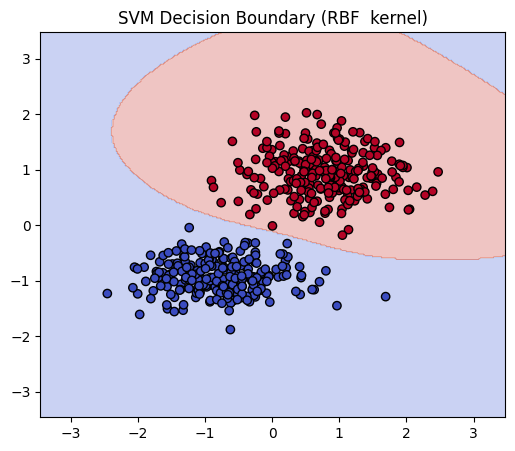

In [28]:
kernels = ['linear','poly','sigmoid','rbf']


for kernel in kernels:
    svm = SVC(kernel=kernel,degree=3,gamma='auto')
    svm.fit(X_train,y_train)

    acc = svm.score(X_test,y_test)
    print(f'Kernel: {kernel.upper()}||Accuracy:{acc:.2f}')    


    plt.figure(figsize=(6,5))
    plt.title(f'SVM Decision Boundary ({kernel.upper()}  kernel)')
    x_min,x_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    y_min,y_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    

    Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx,yy,Z,alpha=0.3,cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()